In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [2]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [3]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 80, 
    maxiter = 60, 
    mutation_rate = 0.05,
    max_tree_depth = 7  
)

In [4]:
dataset = load_diabetes()
X = dataset.data
y = dataset.target

In [5]:
tester = tester(X, y, generator, 8, 2, 1000, verbose = True, test_size = 0.2, random_state = 42)

Split:  0 Feature:  0
Iteration:  59 Best fitness:  0.3355932203389831 Generation best 0.33239709443099275
Split:  1 Feature:  1
Iteration:  59 Best fitness:  0.16542372881355927 Generation best 0.15205811138014524
Split:  0 Feature:  2
Iteration:  59 Best fitness:  0.36571428571428577 Generation best 0.33675544794188864
Split:  1 Feature:  3


C:\Users\David Arcos\AppData\Local\Temp\ipykernel_27216\513395231.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hypot(x, y))


Iteration:  59 Best fitness:  0.15322033898305087 Generation best 0.10983050847457632
Split:  0 Feature:  4
Iteration:  59 Best fitness:  0.36571428571428577 Generation best 0.32116222760290563
Split:  1 Feature:  5
Iteration:  59 Best fitness:  0.1639709443099273 Generation best 0.134527845036319657
Split:  0 Feature:  6
Iteration:  59 Best fitness:  0.37230024213075064 Generation best 0.37230024213075064
Split:  1 Feature:  7
Iteration:  59 Best fitness:  0.17152542372881352 Generation best 0.13220338983050858


In [6]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

7
7
7
7
6
7
7
6


In [7]:
tester.test_models(notests=50)

In [8]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,2945.302579,0.444089,44.153257,2752.502351,0.480479,41.913041
1,MLPRegressor,4557.368451,0.139819,52.033184,4623.838601,0.127273,53.787698
2,GradientBoostingRegressor,3702.534557,0.301165,49.002566,3974.346919,0.249862,49.128083


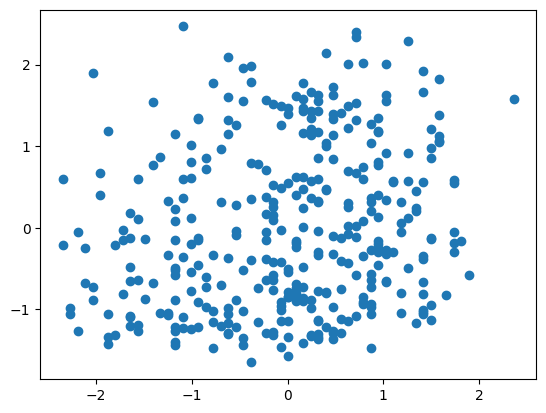

Min:  -2.3486324538364367 Max:  2.3619769564150532 Mean:  1.5096517048727343e-17 Std:  1.0000000000000009


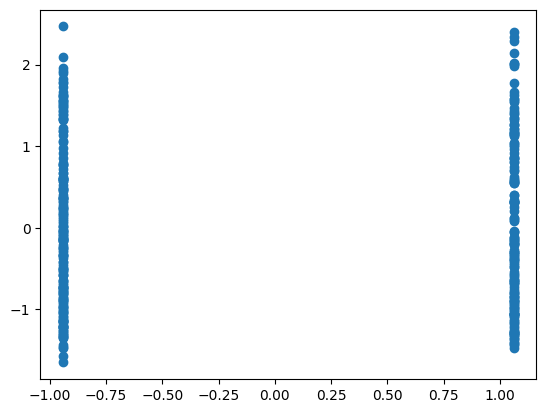

Min:  -0.9421786108585579 Max:  1.0613698809069299 Mean:  6.290215436969726e-17 Std:  1.0000000000000022


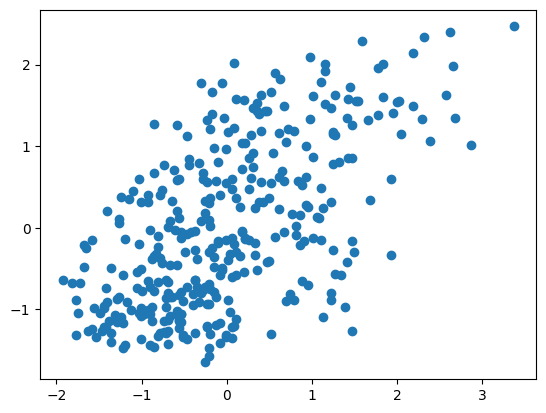

Min:  -1.9262122659964824 Max:  3.3705804187140114 Mean:  -6.290215436969726e-17 Std:  1.0


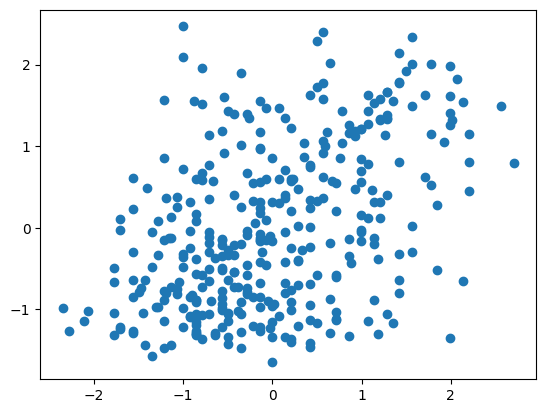

Min:  -2.3466560493895967 Max:  2.7038054721359144 Mean:  1.5096517048727343e-17 Std:  1.0


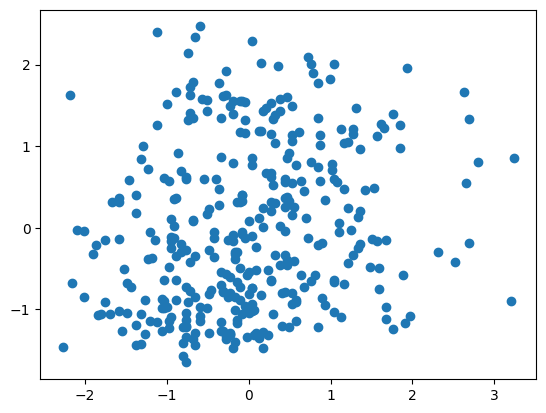

Min:  -2.270371764140696 Max:  3.2371217759635766 Mean:  -3.7741292621818353e-17 Std:  1.0000000000000002


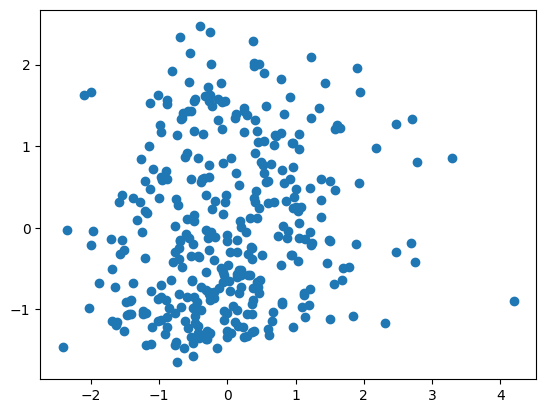

Min:  -2.413754204699228 Max:  4.196352273913501 Mean:  -2.5160861747878903e-18 Std:  1.0000000000000002


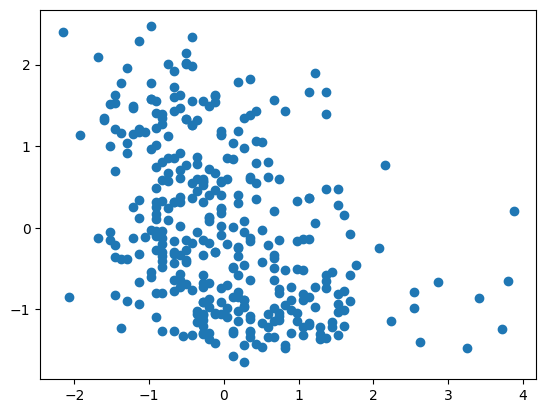

Min:  -2.1567593564585774 Max:  3.877815358441891 Mean:  5.0321723495757804e-17 Std:  1.0000000000000002


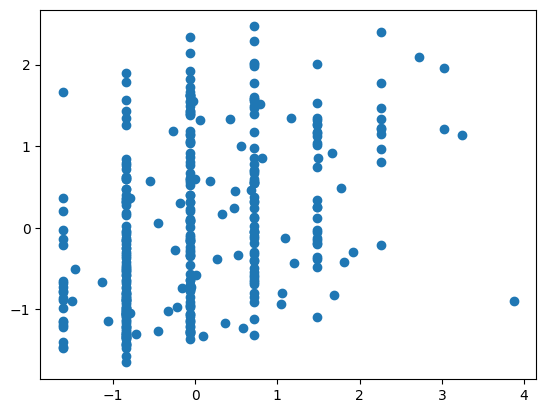

Min:  -1.6087064461483136 Max:  3.873622301436947 Mean:  2.7173730687709215e-16 Std:  1.0000000000000016


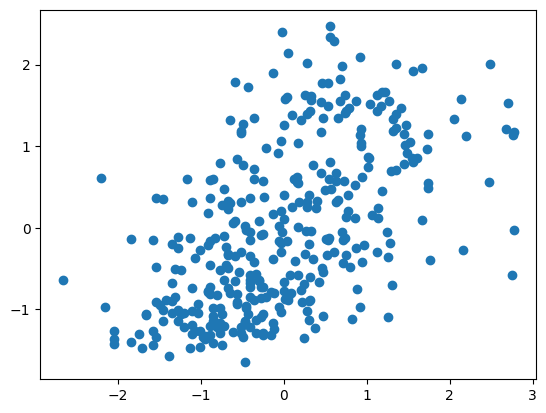

Min:  -2.6656607467111533 Max:  2.7717745232066493 Mean:  4.0257378796606245e-17 Std:  1.0000000000000007


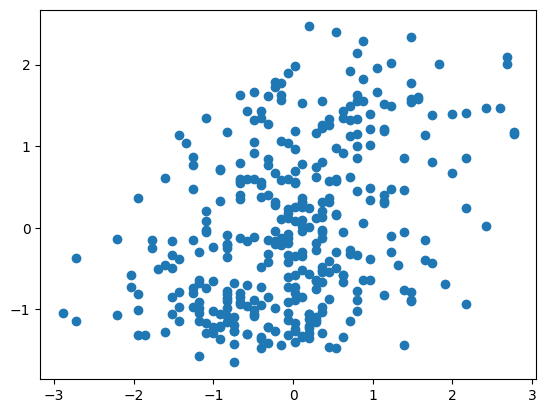

Min:  -2.890772785226981 Max:  2.7678748664465362 Mean:  -4.528955114618202e-17 Std:  0.9999999999999997


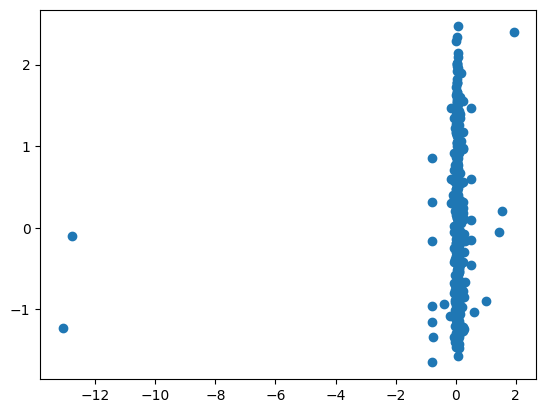

Min:  -13.080606660037963 Max:  1.9289353012081107 Mean:  -2.5160861747878902e-17 Std:  1.0000000000000002


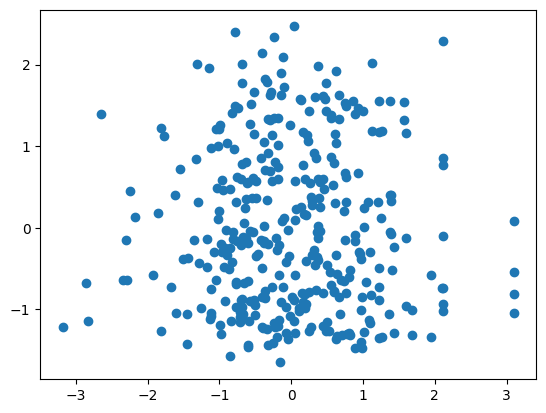

Min:  -3.18099037188842 Max:  3.09838727679848 Mean:  -5.610872169776996e-16 Std:  1.0000000000000002


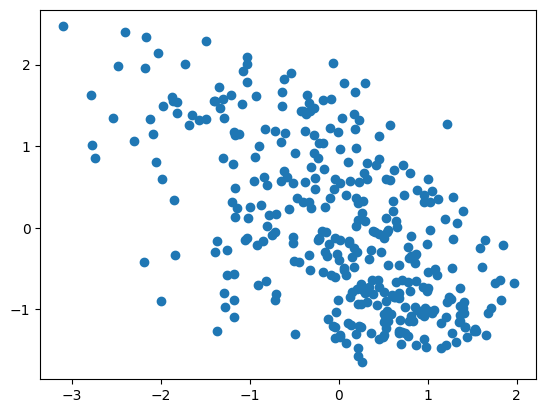

Min:  -3.1023016596483264 Max:  1.9677654201847423 Mean:  -4.528955114618202e-17 Std:  1.0


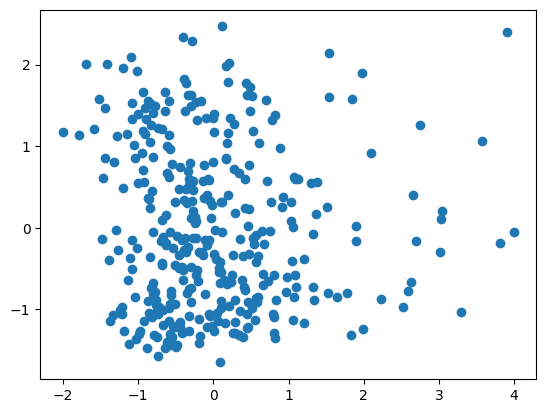

Min:  -2.0035363457917548 Max:  3.9940541278572588 Mean:  -3.1954294419806207e-16 Std:  0.9999999999999998


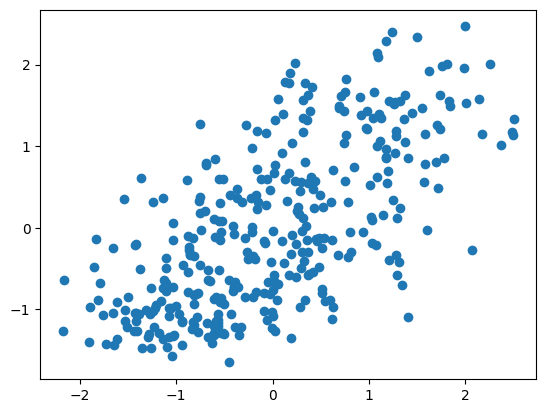

Min:  -2.174116509622639 Max:  2.499704987032077 Mean:  2.0128689398303122e-17 Std:  1.0


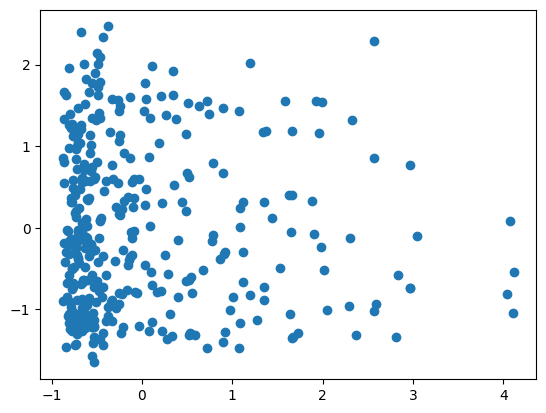

Min:  -0.8756373221457254 Max:  4.112949567581453 Mean:  4.57927683811396e-16 Std:  0.9999999999999998


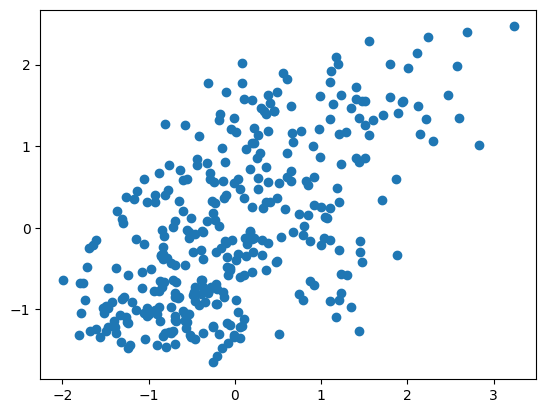

Min:  -1.995007125192371 Max:  3.232580953008919 Mean:  -1.9952563366067967e-15 Std:  1.0


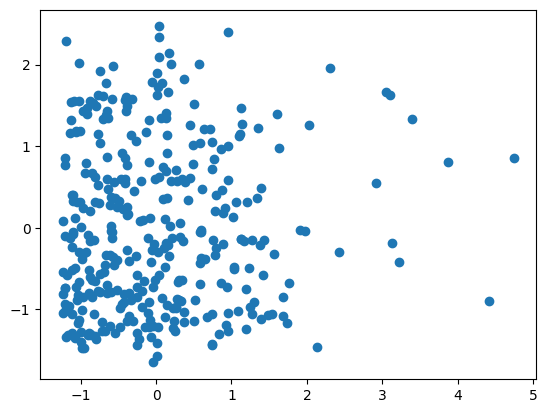

Min:  -1.2376458604754788 Max:  4.742286737360954 Mean:  -6.114089404734574e-16 Std:  1.0000000000000002


In [9]:
for i in range(tester.new_X_train.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_train[:, i], tester.y_train)
    plt.show()
    print("Min: ", tester.new_X_train[:, i].min(), "Max: ", tester.new_X_train[:, i].max(), "Mean: ", tester.new_X_train[:, i].mean(), "Std: ", tester.new_X_train[:, i].std())
    